In [1]:
from skimage.io import imread
from skimage.feature import hog
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

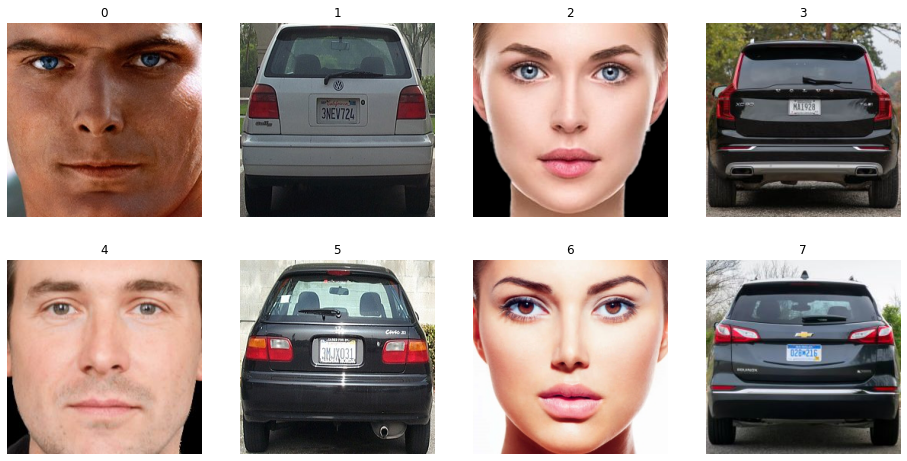

In [2]:
# read the images and store in a list
images = [imread(file) for file in glob.glob("images/*.jpg")]

# number of images
n = len(images)

# show images

fig = plt.figure(figsize=(16, 8))

for i in range(n):
    fig.add_subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(i)

plt.show()

C:\Users\dnemu\AppData\Local\Temp\ipykernel_11004\3702301353.py:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(images[i], orientations=9, pixels_per_cell=(


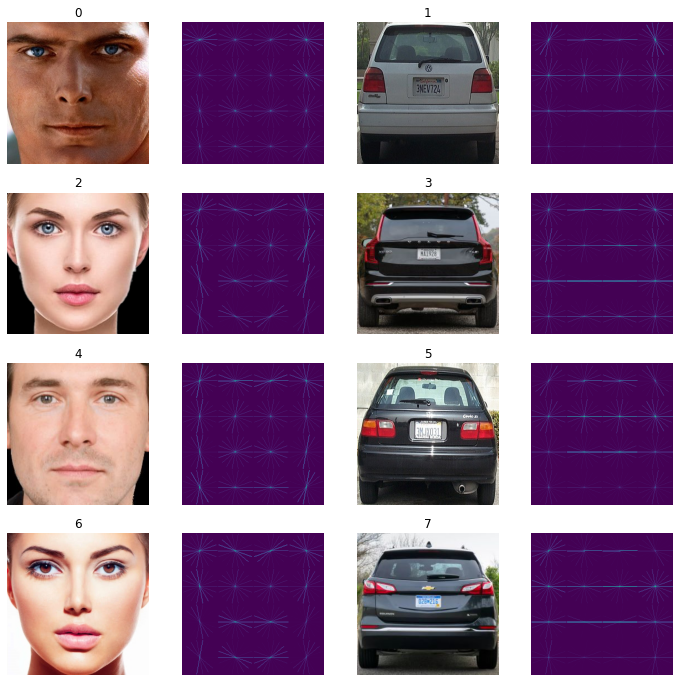

In [3]:
# creating a list to store HOG feature vectors
fd_list = []

fig = plt.figure(figsize=(12, 12))
k = 0

for i in range(n):

    # execute hog function for each image that is imported from skimage.feature module
    fd, hog_image = hog(images[i], orientations=9, pixels_per_cell=(
        64, 64), cells_per_block=(2, 2), visualize=True, multichannel=True)

    # add the feature vector to the list
    fd_list.append(fd)

    # display hog image
    fig.add_subplot(4, 4, k+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(i)

    # display original image
    fig.add_subplot(4, 4, k+2)
    plt.imshow(hog_image)
    plt.axis("off")

    k += 2

plt.show()

In [4]:
# create an empty nxn distance matrix
distance_matrix = np.zeros((n, n))

for i in range(n):
    fd_i = fd_list[i]
    for k in range(i):
        fd_k = fd_list[k]
        # measure Jensen–Shannon distance between each feature vector
        # and add to the distance matrix
        distance_matrix[i, k] = distance.jensenshannon(fd_i, fd_k)

# symmetrize the matrix as distance matrix is symmetric
distance_matrix = np.maximum(distance_matrix, distance_matrix.transpose())

distance_matrix

array([[0.        , 0.21668534, 0.2053017 , 0.29673321, 0.11714878,
        0.19228613, 0.18577299, 0.30157715],
       [0.21668534, 0.        , 0.25553919, 0.18902859, 0.22001129,
        0.12968395, 0.24286811, 0.17783984],
       [0.2053017 , 0.25553919, 0.        , 0.34236163, 0.16659271,
        0.24649133, 0.08186722, 0.33763304],
       [0.29673321, 0.18902859, 0.34236163, 0.        , 0.30279613,
        0.22517062, 0.31988354, 0.17019618],
       [0.11714878, 0.22001129, 0.16659271, 0.30279613, 0.        ,
        0.19191148, 0.14927076, 0.31512683],
       [0.19228613, 0.12968395, 0.24649133, 0.22517062, 0.19191148,
        0.        , 0.23657825, 0.19442411],
       [0.18577299, 0.24286811, 0.08186722, 0.31988354, 0.14927076,
        0.23657825, 0.        , 0.31916923],
       [0.30157715, 0.17783984, 0.33763304, 0.17019618, 0.31512683,
        0.19442411, 0.31916923, 0.        ]])

In [5]:
# convert square-form distance matrix to vector-form distance vector (condensed distance matrix)
cond_distance_matrix = distance.squareform(distance_matrix)

cond_distance_matrix

array([0.21668534, 0.2053017 , 0.29673321, 0.11714878, 0.19228613,
       0.18577299, 0.30157715, 0.25553919, 0.18902859, 0.22001129,
       0.12968395, 0.24286811, 0.17783984, 0.34236163, 0.16659271,
       0.24649133, 0.08186722, 0.33763304, 0.30279613, 0.22517062,
       0.31988354, 0.17019618, 0.19191148, 0.14927076, 0.31512683,
       0.23657825, 0.19442411, 0.31916923])

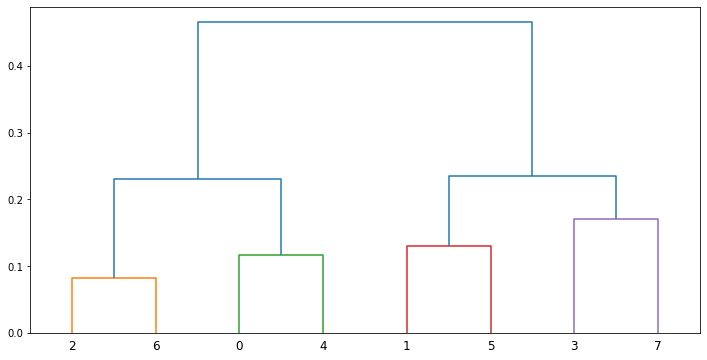

In [6]:
Z = linkage(cond_distance_matrix, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, color_threshold=0.2, show_leaf_counts=True)
plt.show()